# Chap6-17 Support Vector Machines in sklearn
[Statistical] (http://faculty.marshall.usc.edu/gareth-james/)

In [1]:
# Import statements 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Read the data.
data = np.asarray(pd.read_csv('chap6_data.csv', header=None))
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(96, 3)


In [26]:
# Use mask to identify to help create two datasets and facilitate ploting
blue_mask = data[:,2] == 0
blue = data[blue_mask]
red = data[~blue_mask]
len(red)+len(blue)

96

In [7]:
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

Text(0, 0.5, 'X2')

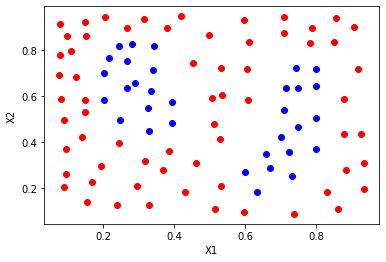

In [33]:
plt.scatter(red[:,0], red[:,1] , color = 'red')
plt.scatter(blue[:,0], blue[:,1] , color = 'blue')
plt.xlabel('X1')
plt.ylabel('X2')

**Hyperparameters**
When we define the model, we can specify the hyperparameters. As we've seen in this section, the most common ones are

- C: The C parameter.
- kernel: The kernel. The most common ones are 'linear', 'poly', and 'rbf'.
- degree: If the kernel is polynomial, this is the maximum degree of the monomials in the kernel.
- gamma : If the kernel is rbf, this is the gamma parameter.

For example, here we define a model with a polynomial kernel of degree 4, and a C parameter of 0.1.

In [30]:
# Create the model and assign it to the variable model.
# Find the right parameters for this model to achieve 100% accuracy on the dataset.
model = SVC(kernel='rbf', gamma=27)

In [41]:
# Fit the model.
model.fit(X, y)

# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TCalculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(acc)

1.0


object that are of interest when you want to do something with the support vectors of your model:

- The `support_` variable, which holds the index numbers of the samples from your training set that were found to be the support vectors.
- The `n_support_` variable, which produces the number of support vectors for every class.
- The `support_vectors_` variable, which produces the support vectors themselves – so that you don’t need to perform an array search after using support_.
[Example](https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/)

In [38]:
support_vector_indices = model.support_      # Get support vector indices
print(support_vector_indices)
support_vectors_per_class = model.n_support_ # Get number of support vectors per class
print(support_vectors_per_class)
support_vectors = model.support_vectors_     # Get support vectors themselves

[ 0  1  2  3  4  5  6  7 10 11 16 17 18 19 20 21 22 23 25 26 27 33 34 37
 39 41 42 43 44 46 47 53 54 55 56 58 61 62 63 64 65 71 75 79 80 83 84 88]
[21 27]


Text(0, 0.5, 'X2')

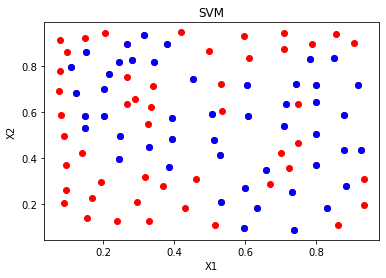

In [40]:
plt.scatter(X[:,0], X[:,1], color='red')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='blue')
plt.title('SVM')
plt.xlabel('X1')
plt.ylabel('X2')